# Project 1.2 - 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

### (1) 데이터 가져오기

In [1]:
import pandas as pd
# https://www.kaggle.com/competitions/bike-sharing-demand/data?select=train.csv
# 다운로드 하여 './data/train.csv' 생성
train = pd.read_csv('./data/train.csv')

### (2) datetime 컬럼을 datetime 자료형으로 변환하기

In [2]:
bike_datetime = pd.to_datetime(train['datetime'])

### (3) 연, 월, 일, 시, 분, 초 6가지 컬럼 생성하기

In [3]:
train['year'] = bike_datetime.dt.year
train['month'] = bike_datetime.dt.month
train['day'] = bike_datetime.dt.day
train['hour'] = bike_datetime.dt.hour
train['minute'] = bike_datetime.dt.minute
train['second'] = bike_datetime.dt.second

### (4) year, month, day, hour, minute, second 데이터 개수 시각화하기

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='second', ylabel='count'>

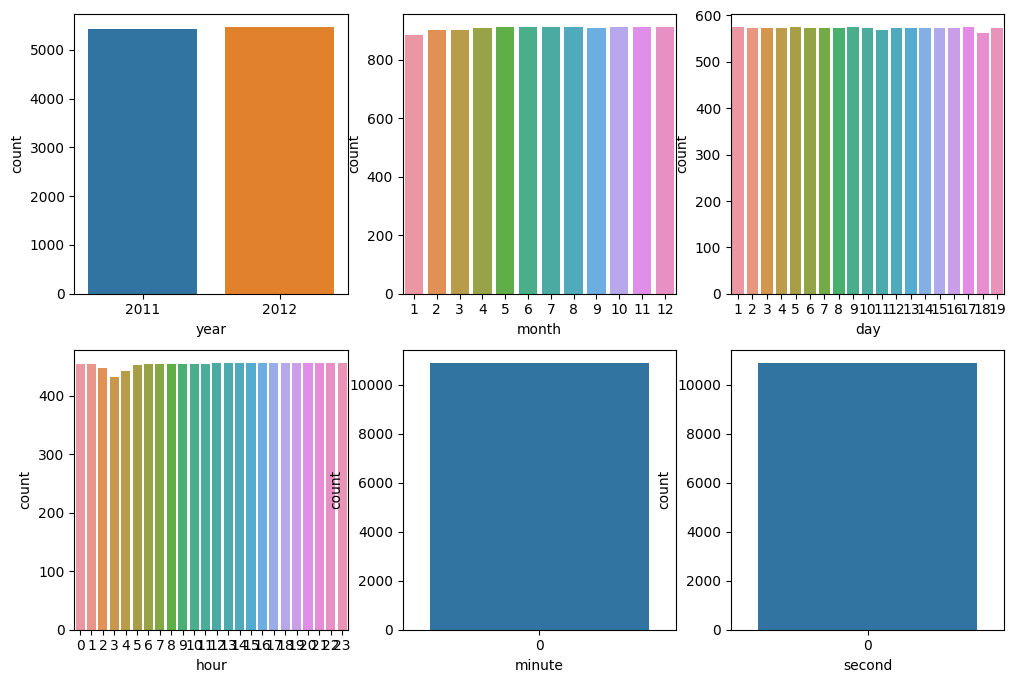

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
sns.countplot(data=train, x='year', ax=ax[0,0])
sns.countplot(data=train, x='month', ax=ax[0,1])
sns.countplot(data=train, x='day', ax=ax[0,2])
sns.countplot(data=train, x='hour', ax=ax[1,0])
sns.countplot(data=train, x='minute', ax=ax[1,1])
sns.countplot(data=train, x='second', ax=ax[1,2])

### (5) X, y 컬럼 선택 및 train/test 데이터 분리하기

In [41]:
from sklearn.model_selection import train_test_split
new_columns = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual']
X_train, X_test, y_train, y_test = train_test_split(train[new_columns], train['count'], test_size=0.2, random_state=30)

In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8708, 9) (2178, 9) (8708,) (2178,)


### (6) LinearRegression 모델 학습하기

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### (7) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [44]:
from sklearn.metrics import mean_squared_error
prediction = model.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse ** 0.5
print(prediction)
print(mse)
print(rmse)

[112.88223589 104.49604773  74.6674428  ... 179.1744139   92.01302724
 164.73309316]
15504.348038583385
124.51645689860993


### (8) x축은 temp, y축은 count로 예측 결과 시각화하기

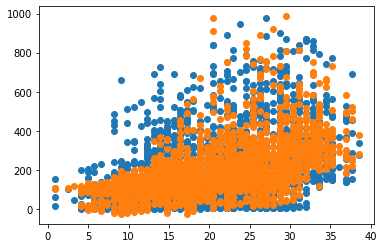

In [45]:
plt.scatter(X_test['temp'], y_test)
plt.scatter(X_test['temp'], prediction)
plt.show()

### (9) x축은 humidity, y축은 count로 예측 결과 시각화하기

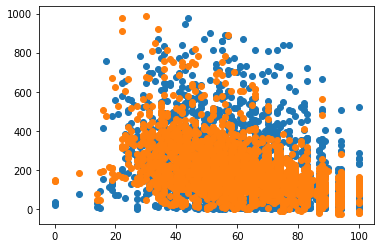

In [46]:
plt.scatter(X_test['humidity'], y_test)
plt.scatter(X_test['humidity'], prediction)
plt.show()